In [ ]:
import numpy as np
import pandas as pd 
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,10
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima



In [ ]:
data = pd.read_csv("/content/TCS_final_2010-21_Daily.csv",index_col= 'Date')
print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

            DateValue        Open  ...   Adj Close     Volume
Date                               ...                       
2010-01-04      40182  377.399994  ...  302.451019  1963682.0
2010-01-05      40183  377.500000  ...  302.531525  2014488.0
2010-01-06      40184  375.924988  ...  295.690979  3349176.0
2010-01-07      40185  367.750000  ...  287.462311  6474892.0
2010-01-08      40186  358.000000  ...  281.587463  6048178.0

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 2751 entries, 2010-01-04 to 2021-03-02
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DateValue  2751 non-null   int64  
 1   Open       2751 non-null   float64
 2   High       2751 non-null   float64
 3   Low        2751 non-null   float64
 4   Close      2751 non-null   float64
 5   Adj Close  2751 non-null   float64
 6   Volume     2751 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 171.9+ KB
DatetimeIndex([

,DateValue,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,40182,377.399994,379.450012,374.524994,375.825012,302.451019,1963682.0
2010-01-05,40183,377.500000,379.774994,373.274994,375.924988,302.531525,2014488.0
2010-01-06,40184,375.924988,376.100006,366.500000,367.424988,295.690979,3349176.0
2010-01-07,40185,367.750000,369.700012,355.500000,357.200012,287.462311,6474892.0
2010-01-08,40186,358.000000,359.250000,348.250000,349.899994,281.587463,6048178.0


In [ ]:
data= data['Close']
data_Close = data

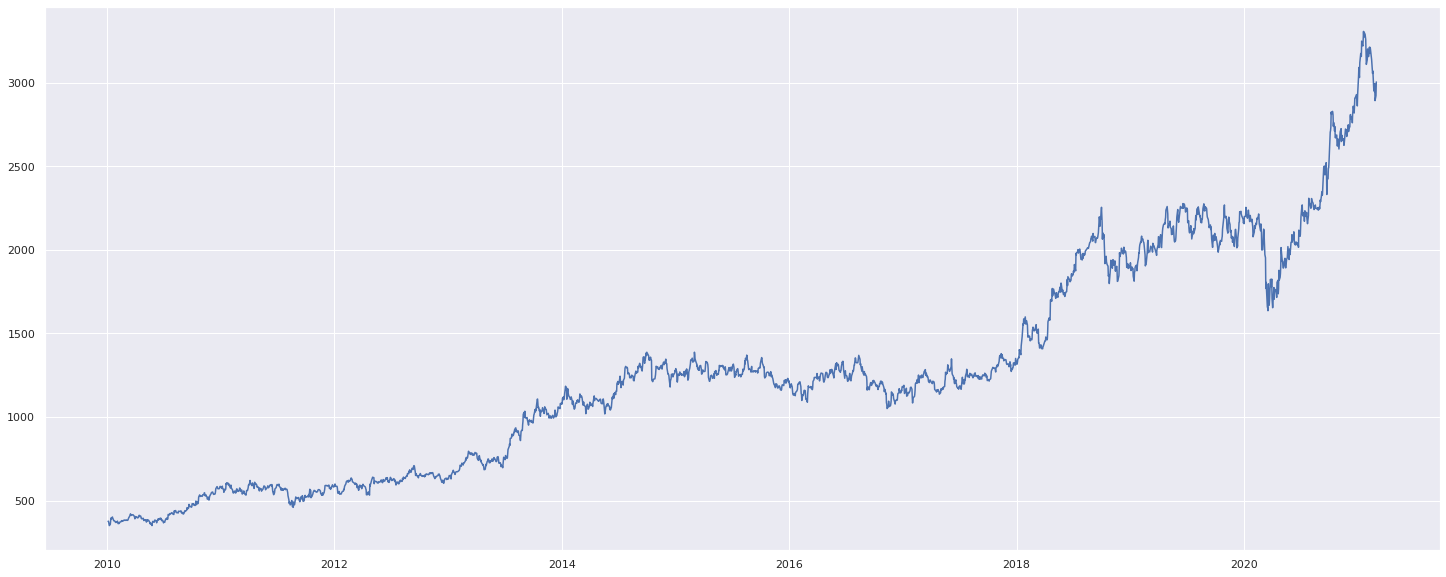

In [ ]:
plt.plot(data_Close)


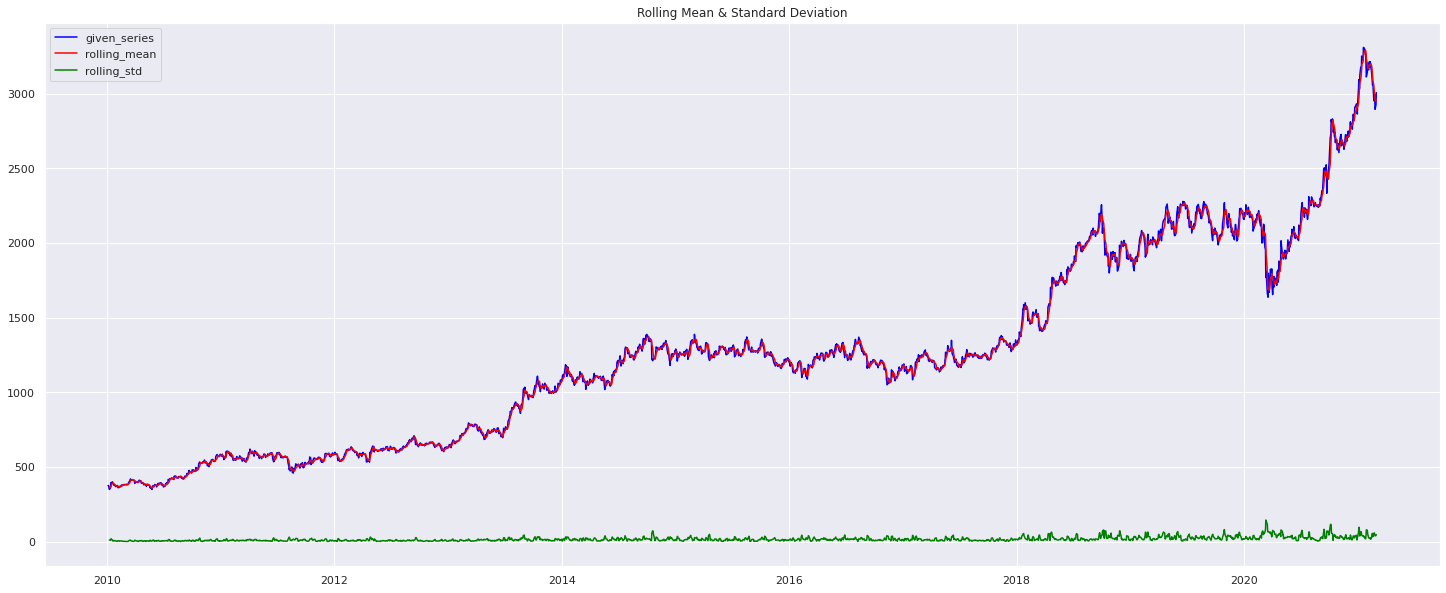

Results of Dickey-Fuller Test:
Test Statistic                    1.236939
p-value                           0.996231
#Lags Used                       28.000000
Number of Observations Used    2722.000000
Critical Value (1%)              -3.432755
Critical Value (5%)              -2.862602
Critical Value (10%)             -2.567336
dtype: float64


In [ ]:
def dickeyFuller_test(input_data):
    r_mean = input_data.rolling(window = 5,center=False).mean()
    r_std = input_data.rolling(window = 5,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
dickeyFuller_test(data_Close) 

In [ ]:
data_Close_log = np.log(data_Close)


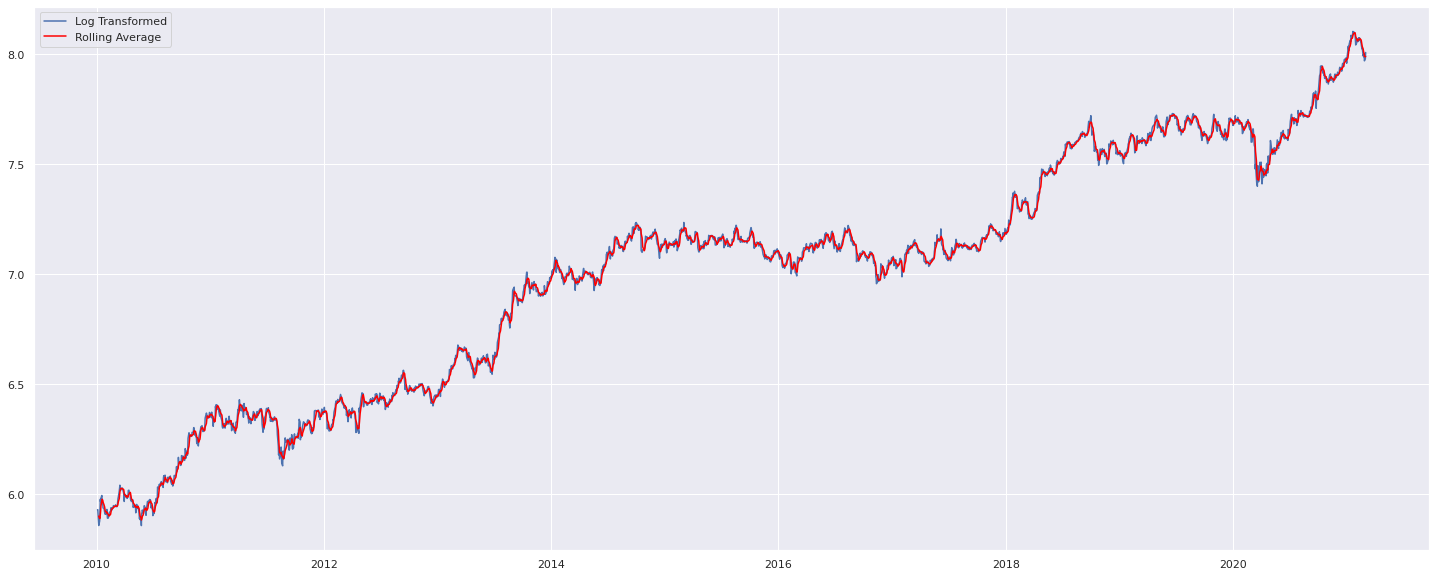

In [ ]:
data_Close_rolling_Avg = data_Close_log.rolling(window = 5, center= False).mean()
plt.plot(data_Close_log, label = 'Log Transformed')
plt.plot(data_Close_rolling_Avg, color = 'red', label = 'Rolling Average') 
plt.legend(loc = 'best')

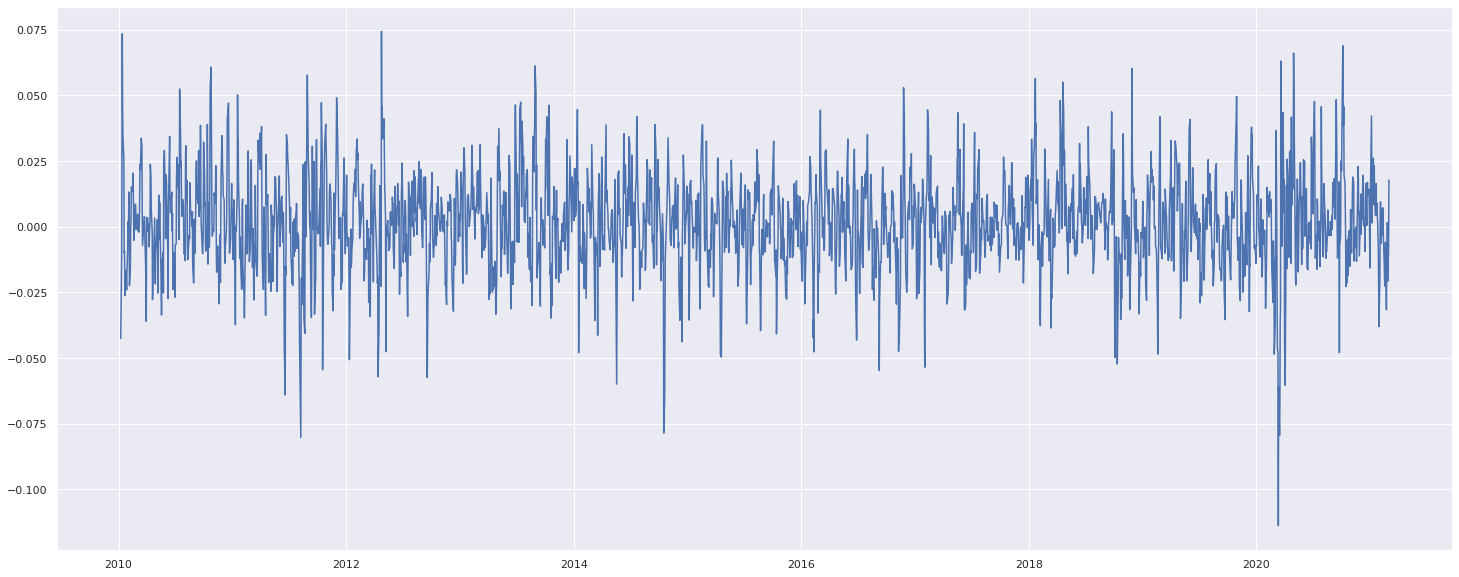

In [ ]:
data_Close_log_roll_diff = data_Close_log - data_Close_rolling_Avg
data_Close_log_roll_diff.dropna(inplace=True)
plt.plot(data_Close_log_roll_diff)

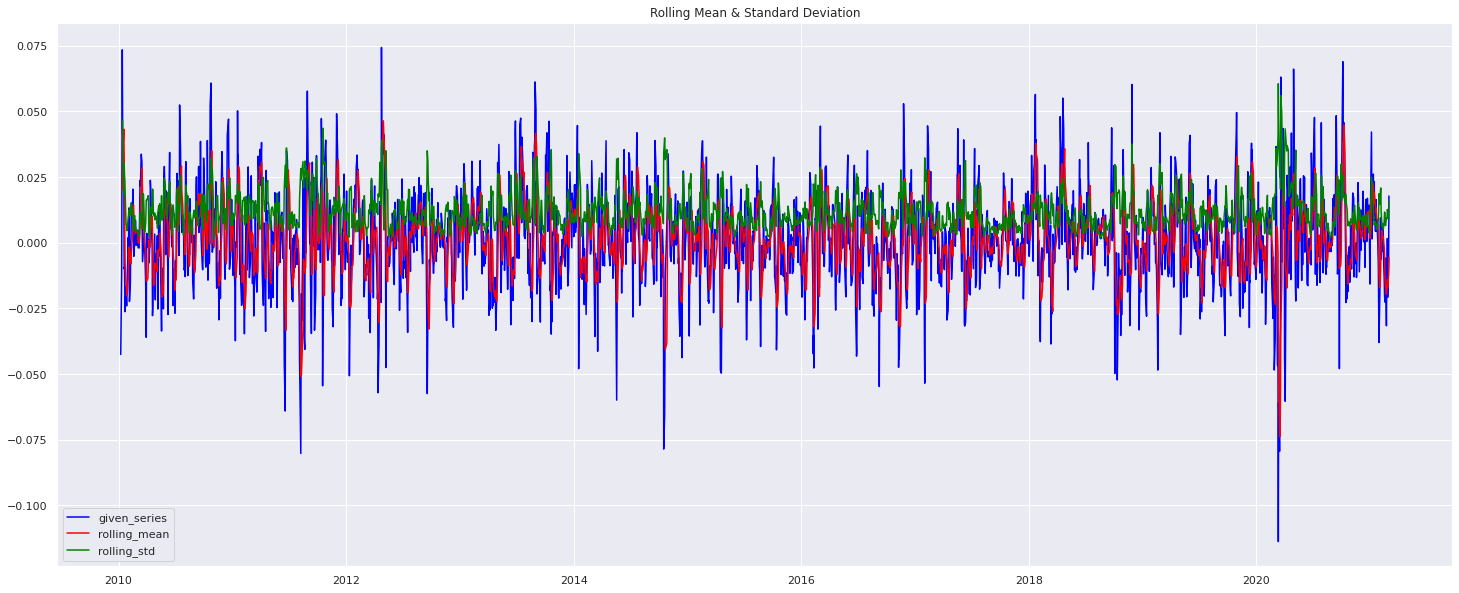

Results of Dickey-Fuller Test:
Test Statistic                  -20.025085
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    2741.000000
Critical Value (1%)              -3.432738
Critical Value (5%)              -2.862595
Critical Value (10%)             -2.567332
dtype: float64


In [ ]:
plt_rolling_diff = data_Close_log_roll_diff
dickeyFuller_test(plt_rolling_diff)

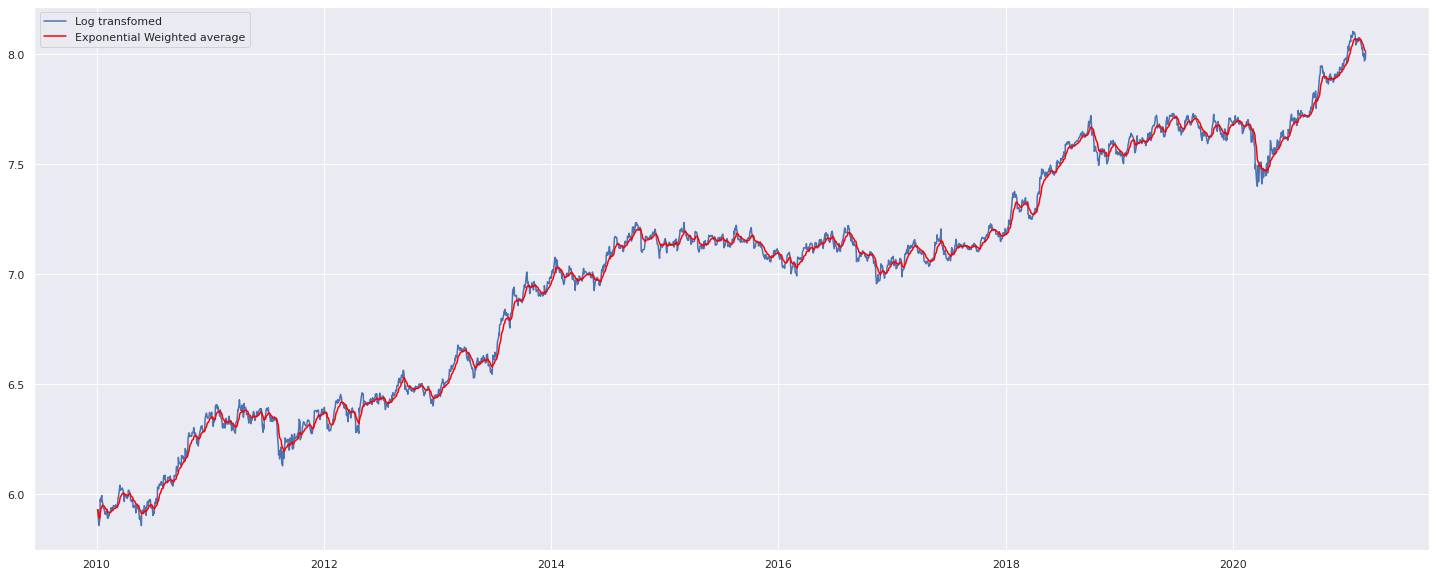

In [ ]:
data_Close_ExpWightAvg = data_Close_log.ewm(halflife=5,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(data_Close_log, label = 'Log transfomed')
plt.plot(data_Close_ExpWightAvg, color='red', label = 'Exponential Weighted average')
plt.legend(loc = 'best')

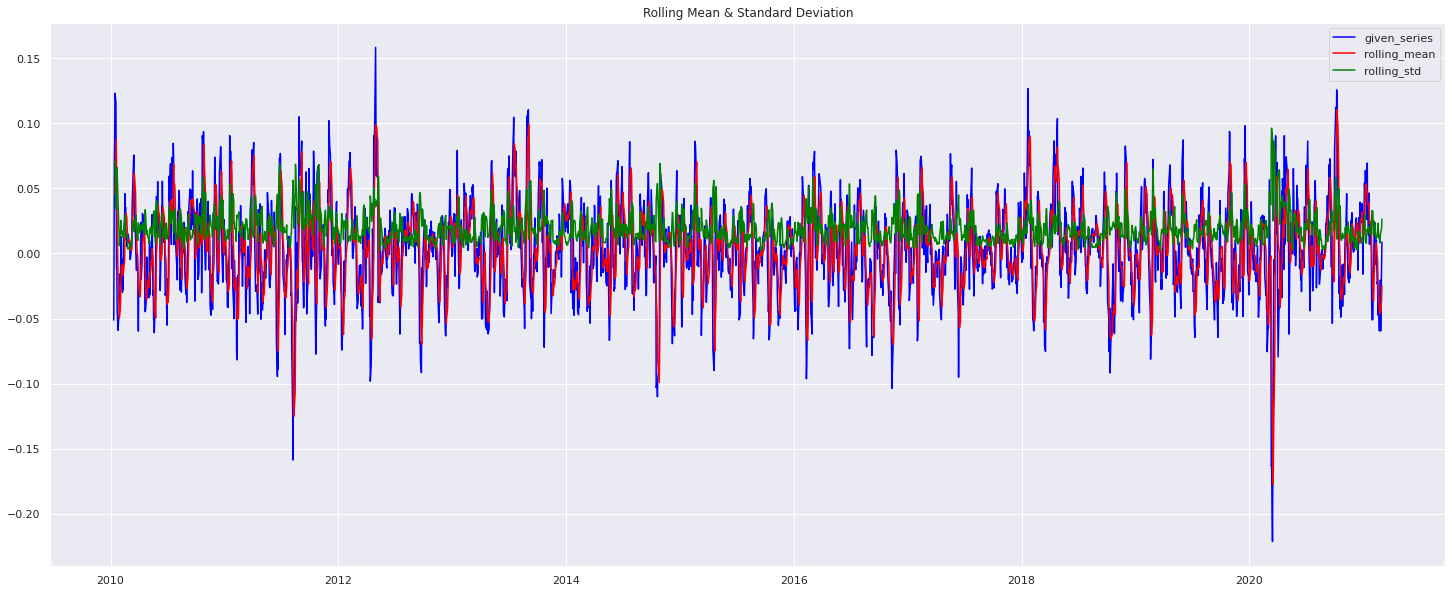

Results of Dickey-Fuller Test:
Test Statistic                -1.124035e+01
p-value                        1.813596e-20
#Lags Used                     2.700000e+01
Number of Observations Used    2.718000e+03
Critical Value (1%)           -3.432758e+00
Critical Value (5%)           -2.862604e+00
Critical Value (10%)          -2.567336e+00
dtype: float64


In [ ]:
data_Close_diff_log = data_Close_log - data_Close_log.shift(5)
data_Close_diff_log.dropna(inplace=True)
dickeyFuller_test(data_Close_diff_log)

In [ ]:
data_decomposition = seasonal_decompose( data_Close_log,freq=5)

trend = data_decomposition.trend
seasonal = data_decomposition.seasonal
residual = data_decomposition.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


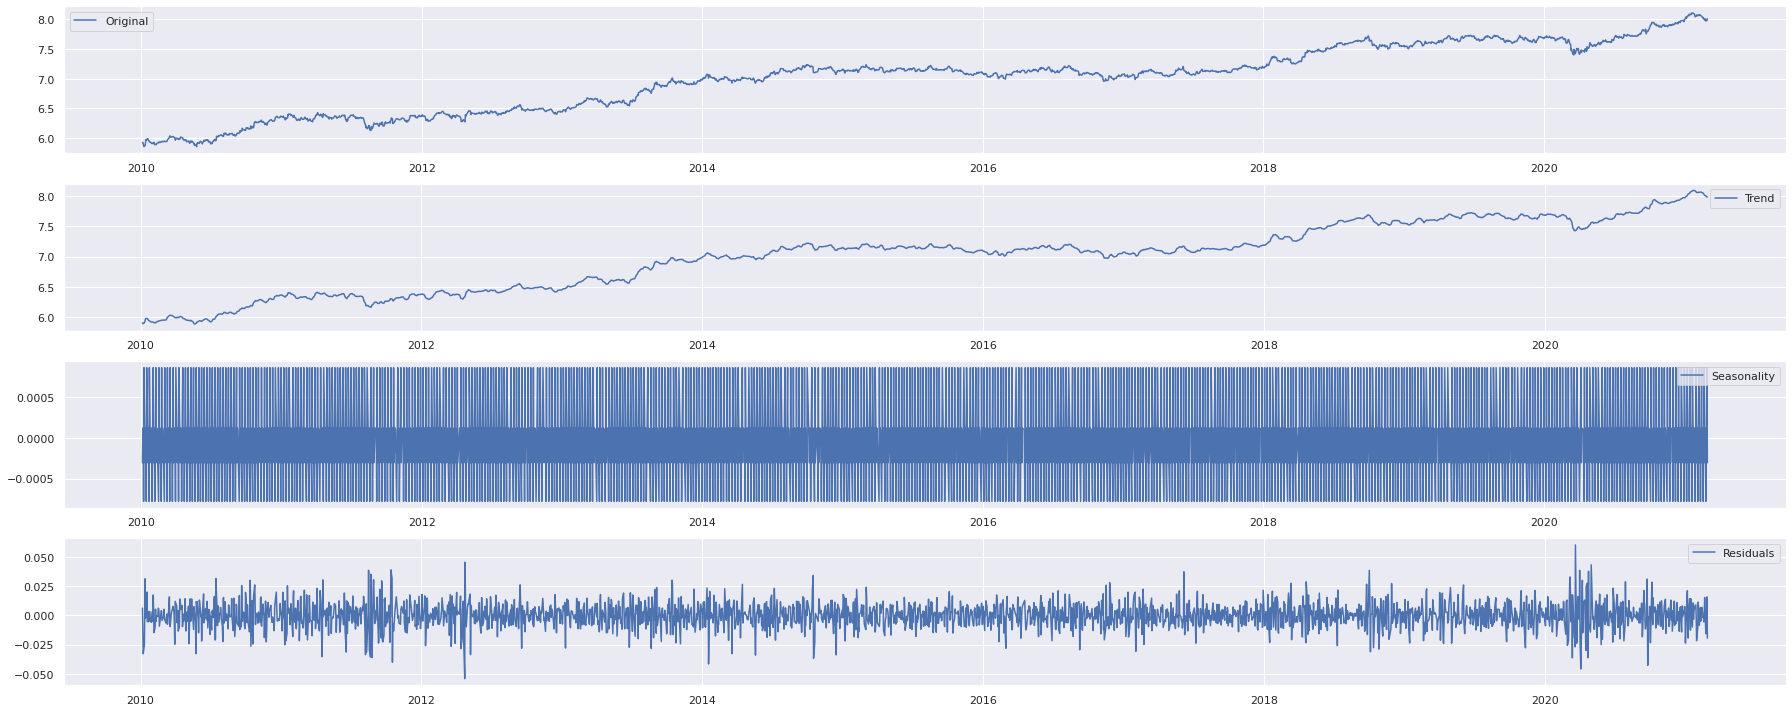

In [ ]:
plt.subplot(411)
plt.plot(data_Close_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

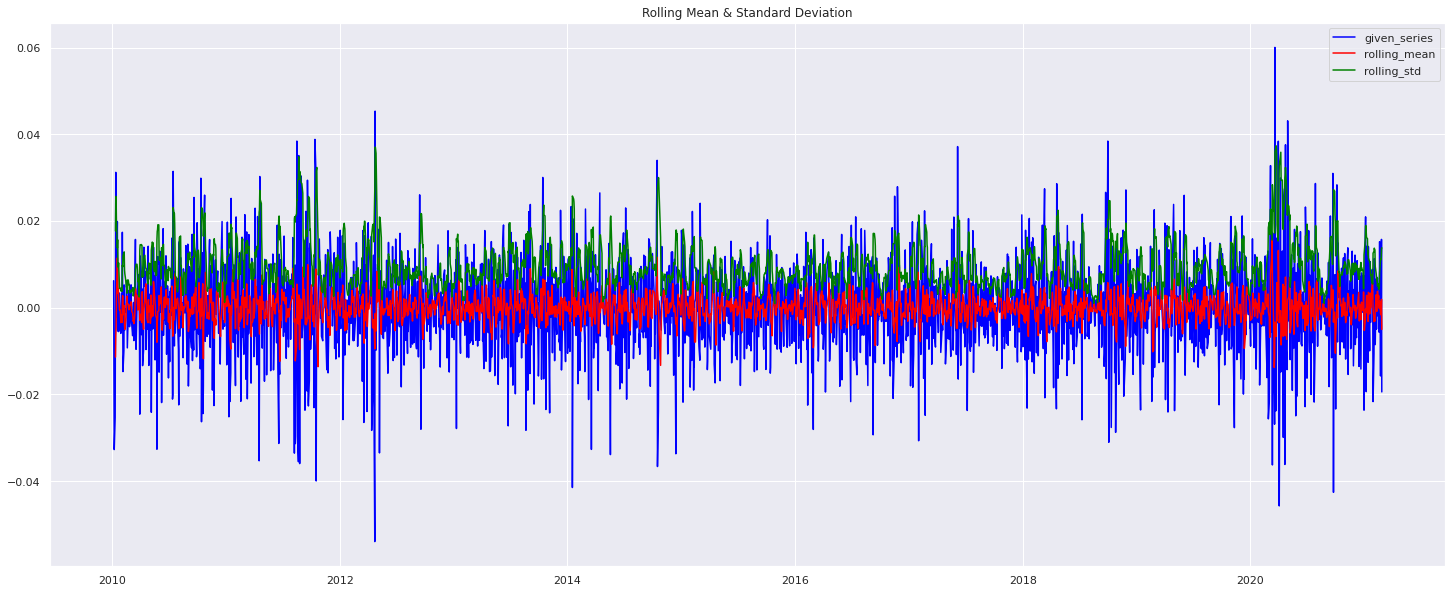

Results of Dickey-Fuller Test:
Test Statistic                -1.847388e+01
p-value                        2.137967e-30
#Lags Used                     2.300000e+01
Number of Observations Used    2.723000e+03
Critical Value (1%)           -3.432754e+00
Critical Value (5%)           -2.862602e+00
Critical Value (10%)          -2.567335e+00
dtype: float64


In [ ]:
data_decompo_res = residual
data_decompo_res.dropna(inplace=True)
dickeyFuller_test(data_decompo_res)

In [ ]:
lag_acf = acf(data_Close_diff_log , nlags=30)
lag_pacf = pacf(data_Close_diff_log, nlags=50, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


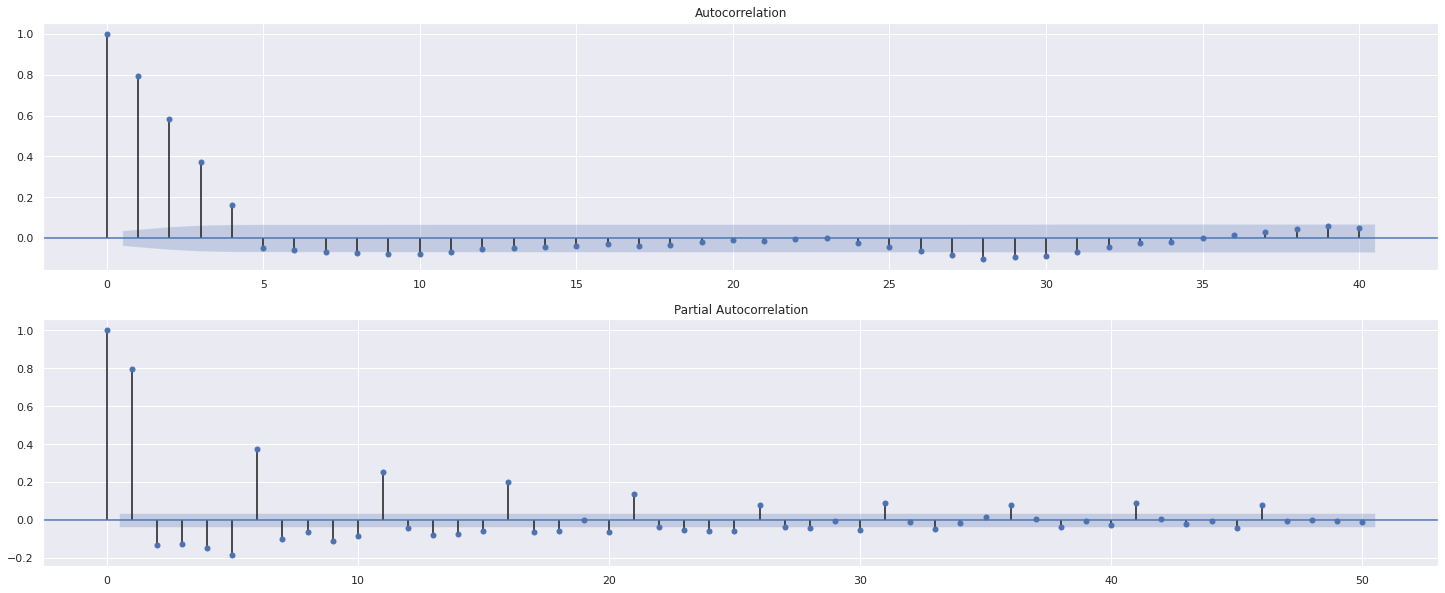

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(data_Close_diff_log, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(data_Close_diff_log, ax=pyplot.gca(), lags=50)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
df_log = data_Close_diff_log.fillna(0)


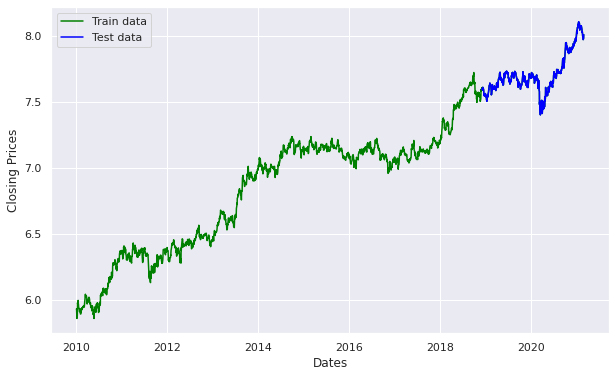

In [ ]:

train_data, test_data = data_Close_log[3:int(len(data_Close_log)*0.80)], data_Close_log[int(len(data_Close_log)*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_Close_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from pmdarima.arima import auto_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

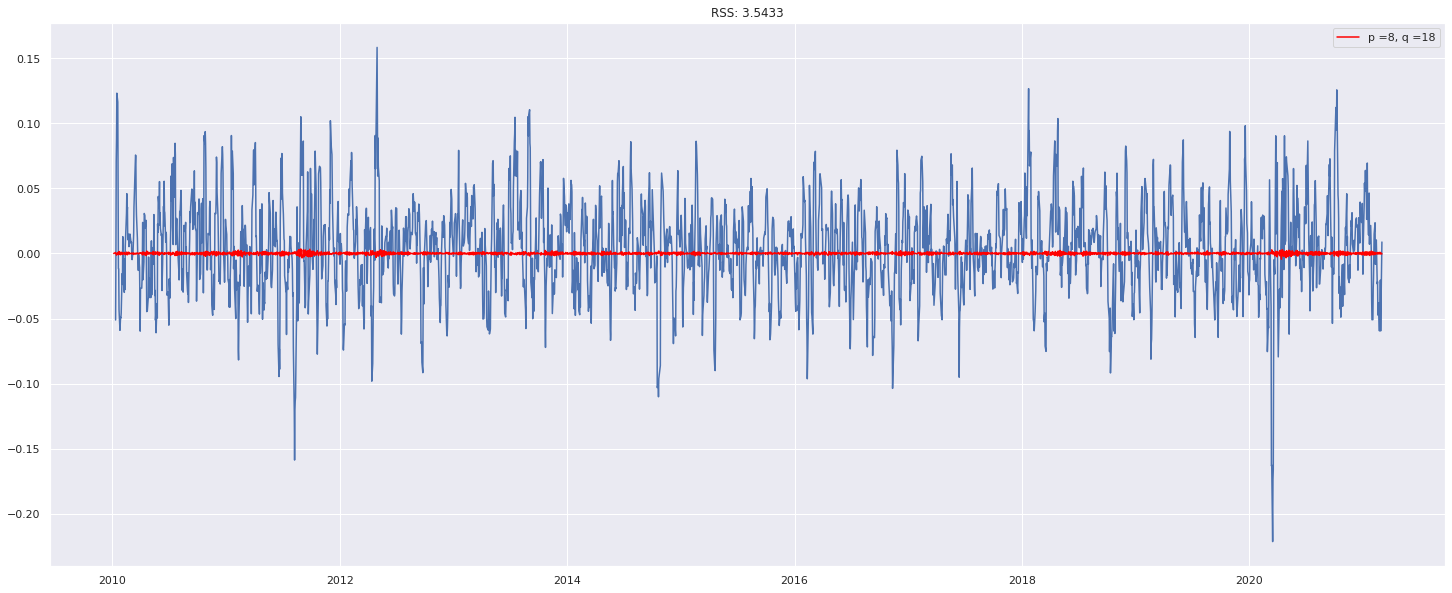

In [ ]:
model = ARIMA(data_Close_log, order=(2, 1, 3))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(data_Close_diff_log)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-data_Close_diff_log
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2750
Model:                 ARIMA(1, 1, 2)   Log Likelihood                7401.010
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sun, 11 Apr 2021   AIC                         -14794.020
Time:                        10:32:08   BIC                         -14770.343
Sample:                             1   HQIC                        -14785.465
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Close     0.9073      0.047     19.299      0.000       0.815       0.999
ma.L1.D.Close    -0.9176      0.051    -18.110      0.000      -1.017      -0.818
ma.L2.D.Close    -0.0080      0.020     

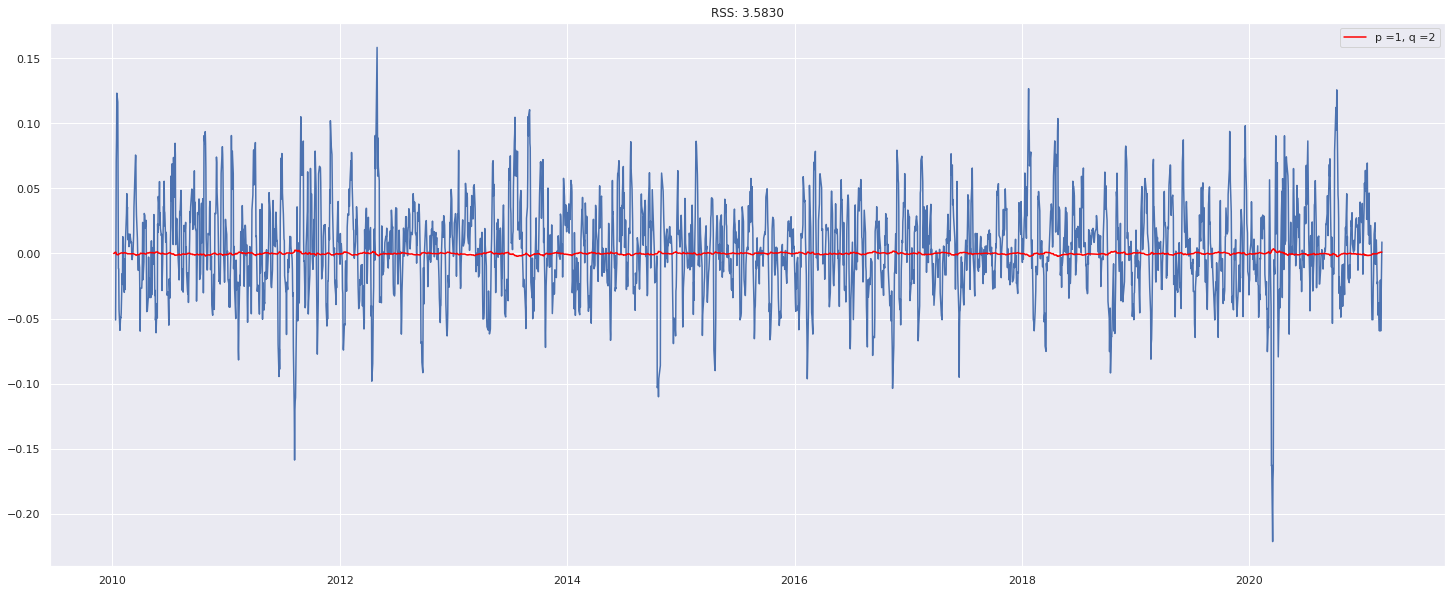

In [ ]:
model2 = ARIMA(data_Close_log, order=(1, 1, 2))  
results_ARIMA2 = model2.fit(trend= 'nc', disp=-1)  
plt.plot(data_Close_diff_log)
plt.plot(results_ARIMA2.fittedvalues, color='red', label = 'p =1, q =2')
RSS =results_ARIMA2.fittedvalues-data_Close_diff_log
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')
print(results_ARIMA2.summary())


In [ ]:
model_splitARIMA = auto_arima( train_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_splitARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11959.975, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11963.890, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11962.145, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11962.157, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11960.504, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.752 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2197
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5983.945
Date:                Sun, 11 Apr 2021   AIC                         -11963.890
Time:                        10:32:55   BIC                         -11952.501
Sample:                             0   HQIC                        -11959.728
                               - 2197                             

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

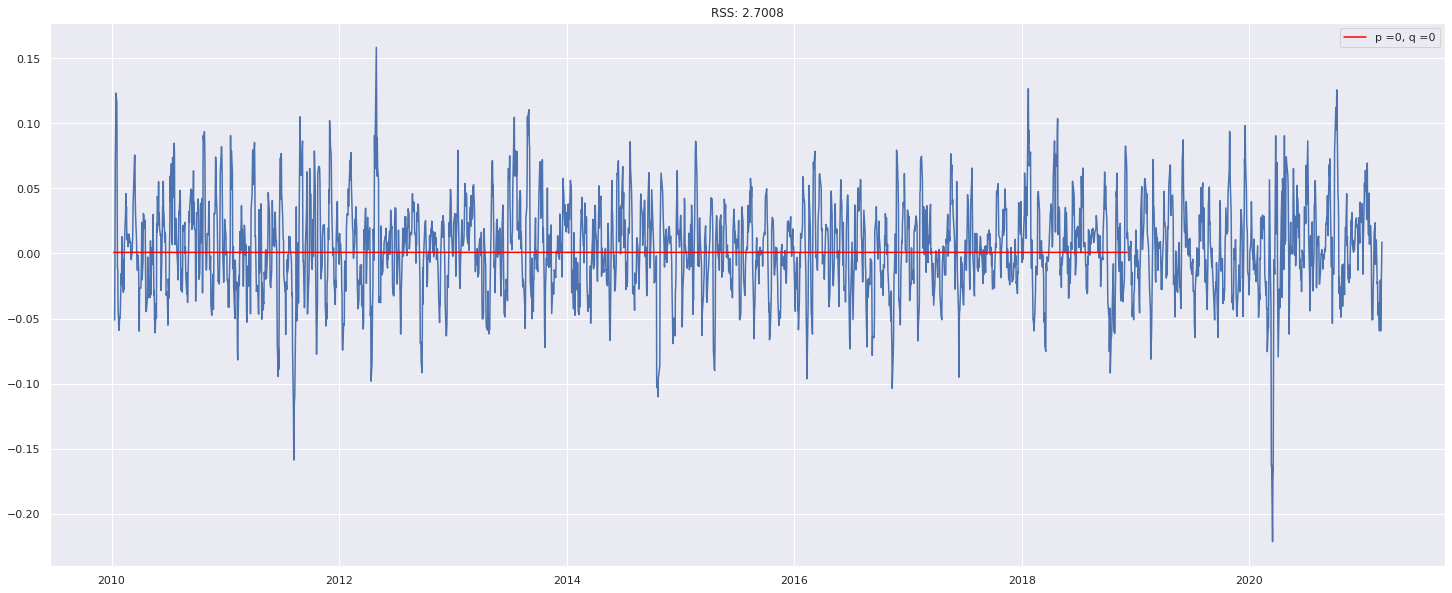

In [ ]:
model1 = ARIMA(train_data, order=(0, 1, 0))  
results_ARIMA11 = model1.fit( disp=-1)  
plt.plot(data_Close_diff_log)
plt.plot(results_ARIMA11.fittedvalues, color='red', label = 'p =0, q =0')
RSS =results_ARIMA11.fittedvalues-data_Close_diff_log
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

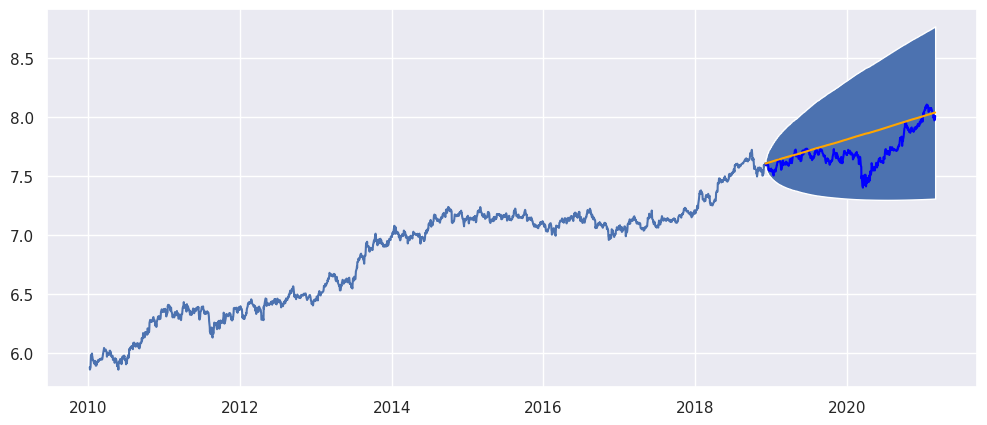

In [ ]:
fc, se, conf = results_ARIMA11.forecast(551, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual')
plt.plot(fc_series, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, fc)
print('MSE: '+ str(round(mse,2)))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(round(mae,2)))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(round(rmse,2)))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(round(mape,2)))

MSE: 0.03
MAE: 0.12
RMSE: 0.16
MAPE: 0.02


In [ ]:
results_ARIMA11.plot_predict(len(test_data));